In [150]:
%pylab inline
import pandas 
import seaborn 

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pandas.read_csv('uber-raw-data-apr14.csv')

In [11]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [9]:
# Convert 'Date/Time' column from string to timestamp
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [15]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [18]:
dt = data['Date/Time'][0]

In [19]:
dt.day

1

In [20]:
dt.month

4

# Data Analysis

In [29]:
# Write a function to create new columns

# Iterates over each element in column
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,weekday,hour,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2,23,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2,23,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2,23,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2,23,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,2,23,30


### Analyze the Day of the Month

#### Histogram

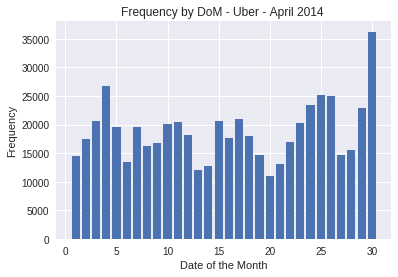

In [78]:
# Set bins to 30 (for each day of the month)
# Set rwidth to .8 (to create a space between bins)
# Set range between .5 to 30.5 to include all days of the month
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))

# Add labels to histogram
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014 ');


#### Plot Days of the Month

In [54]:
# First create a function to groupby the 'dom' column
#def count_rows(rows):
 #   return len(rows)

by_date = data.groupby('dom').apply(count_rows)

In [55]:
# Return count for each day of the month
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

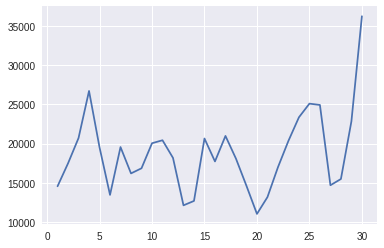

In [77]:
plot(by_date);

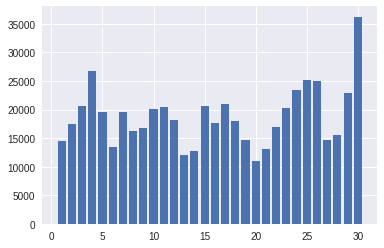

In [79]:
bar(range(1,31), by_date);

In [58]:
# Sorts the by_date data set by value
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

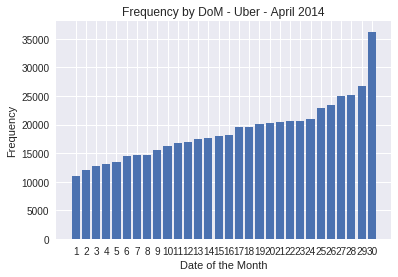

In [80]:
bar(range(1,31), by_date_sorted)
xticks(range(1,31)), by_date_sorted.index;

# Add labels
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014');

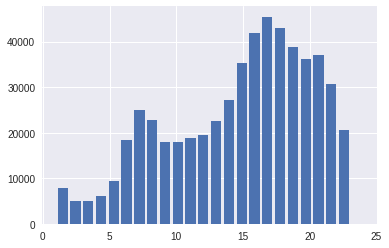

In [82]:
# Analysis by hour
hist(data.hour, bins=24, rwidth=.8, range=(1,24));

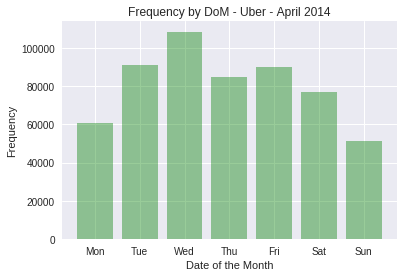

In [95]:
# Analysis by weekday
hist(data.weekday, bins=7, rwidth=.8, range=(-.5,6.5), color='green', alpha=.4);

# Replace 0-6 ticks with Days of the Week for easier readability
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

# Add labels
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014');

#### Cross Analysis of hour and day of the week

In [104]:
# Create a hierarchical histogram using unstack()
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

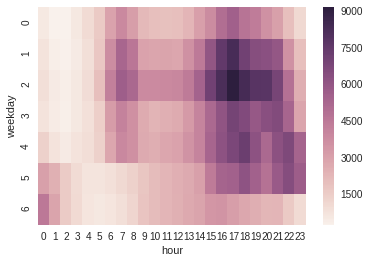

In [110]:
seaborn.heatmap(by_cross);

#### Analysis by latitude and longitude

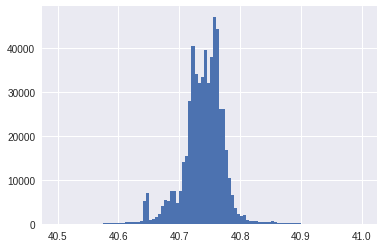

In [115]:
hist(data['Lat'], bins=100, range=(40.5,41));

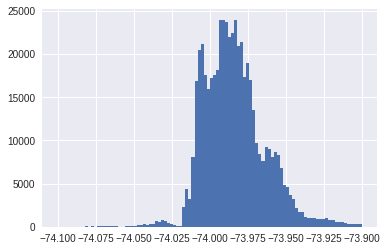

In [117]:
hist(data['Lon'], bins=100, range=(-74.1,-73.9));

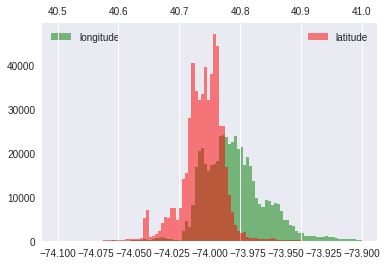

In [134]:
hist(data['Lon'], bins=100, range=(-74.1,-73.9), color='g', alpha=.5, label='longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range=(40.5,41), color='r', alpha=.5, label='latitude');
legend(loc='upper right');

## Plot of Uber Rides in Manhattan, New Jersey, and Outer Boroughs

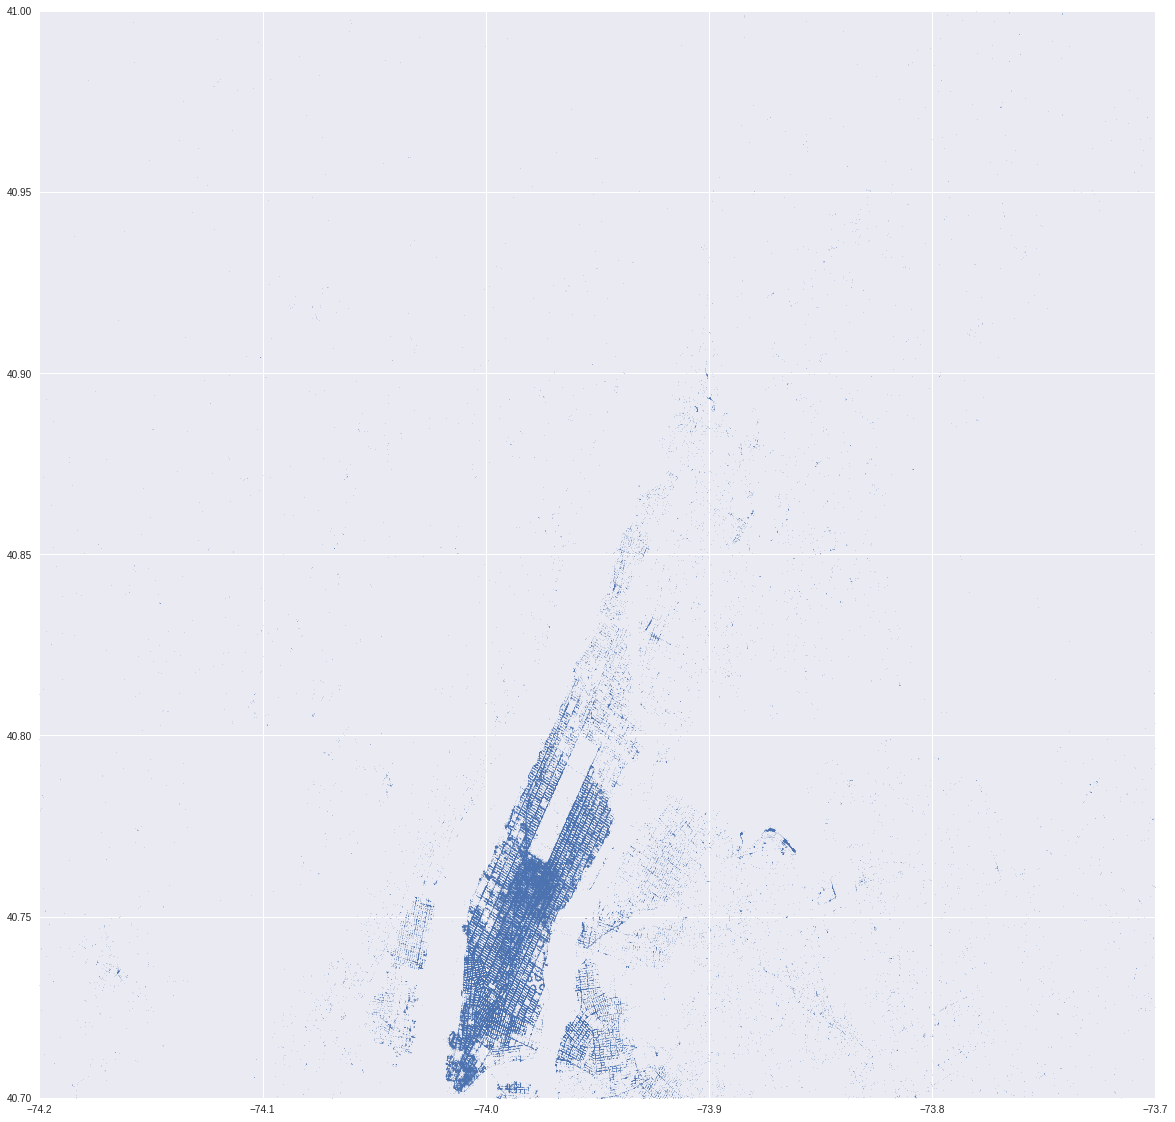

In [146]:
# Increases size of plot
figure(figsize=(20,20))

# Create a plot of Manhattan and surrounding areas
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41);

# Vanilla Python

In [161]:
import csv

In [174]:
fn = 'uber-raw-data-apr14.csv'

In [188]:
fn

'uber-raw-data-apr14.csv'

In [182]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [185]:
data = []
with open(fn) as f:
    for record in csv.DictReader(f):
        data.append(record)

In [184]:
data[0]

OrderedDict([('Date/Time', '4/1/2014 0:11'),
             ('Lat', '40.769'),
             ('Lon', '-73.9549'),
             ('Base', 'B02512')])

In [186]:
longitudes = []
for record in data:
    lon=record['Lon']
    longitudes.append

In [187]:
latitudes = []
for record in data:
    lat=record['Lat']
    latitudes.append

(-74.05, -73.9)

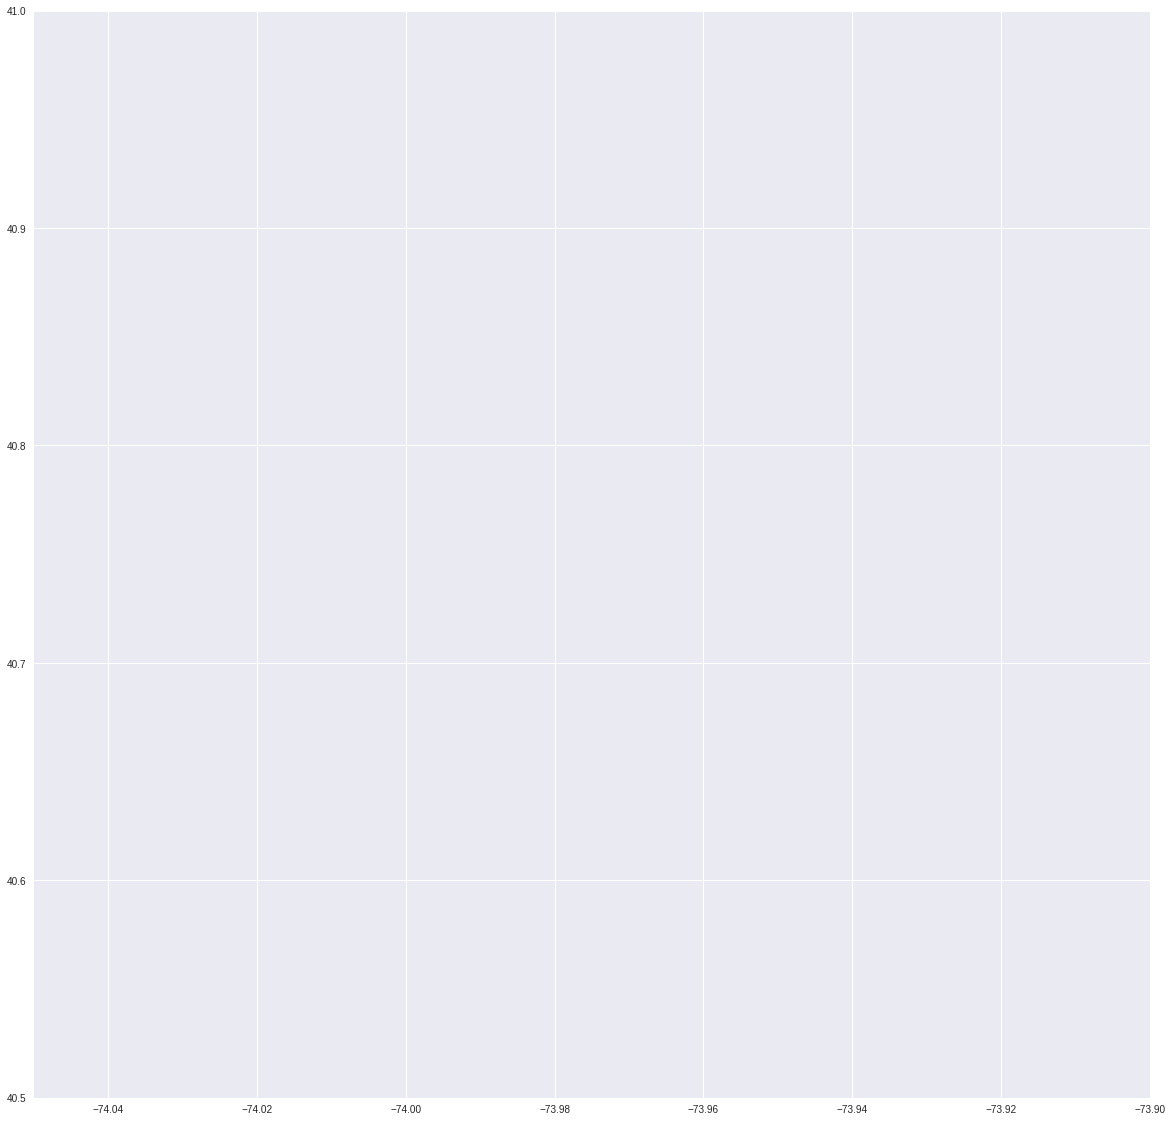

In [183]:
# Increases size of plot
figure(figsize=(20,20))

# Create a plot of Manhattan and surrounding areas
plot(longitudes, latitudes, '.', ms=1)
ylim(40.5, 41)
xlim(-74.05, -73.9)

# Thank you!